In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , confusion_matrix
import time
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler , LabelEncoder , OneHotEncoder
import seaborn as Sb

# Importing and Setting Data

In [6]:
df=pd.read_csv('Desktop/mobile-price-classification/train.csv')

In [7]:
df.price_range.median()
df['Price']=df['price_range'].median()
df.loc[df['price_range'] > df['Price'],'Price']=1
df.loc[df['price_range'] < df['Price'],'Price']=0
df.drop(['price_range'],axis=1,inplace=True)

In [56]:
corr = df.iloc[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 14]].corr().round(4)
corr.style.background_gradient(cmap='RdYlGn', axis= None).set_precision(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,sc_h
battery_power,1,0.011,0.011,-0.042,0.033,0.016,-0.004,0.034,0.0018,-0.03,-0.03
blue,0.011,1,0.021,0.035,0.0036,0.013,0.041,0.004,-0.0086,0.036,-0.003
clock_speed,0.011,0.021,1,-0.0013,-0.0004,-0.043,0.0065,-0.014,0.012,-0.0057,-0.029
dual_sim,-0.042,0.035,-0.0013,1,-0.029,0.0032,-0.016,-0.022,-0.009,-0.025,-0.012
fc,0.033,0.0036,-0.0004,-0.029,1,-0.017,-0.029,-0.0018,0.024,-0.013,-0.011
four_g,0.016,0.013,-0.043,0.0032,-0.017,1,0.0087,-0.0018,-0.017,-0.03,0.027
int_memory,-0.004,0.041,0.0065,-0.016,-0.029,0.0087,1,0.0069,-0.034,-0.028,0.038
m_dep,0.034,0.004,-0.014,-0.022,-0.0018,-0.0018,0.0069,1,0.022,-0.0035,-0.025
mobile_wt,0.0018,-0.0086,0.012,-0.009,0.024,-0.017,-0.034,0.022,1,-0.019,-0.034
n_cores,-0.03,0.036,-0.0057,-0.025,-0.013,-0.03,-0.028,-0.0035,-0.019,1,-0.0003


In [8]:
from sklearn.model_selection import train_test_split # Data split in test and train
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,0:20],df['Price'] , test_size=0.3, random_state=100)

In [55]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Price
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,0.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,0.500125
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,0.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,1.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
from sklearn.preprocessing import StandardScaler #scaling data
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

# Accuracy plots

In [11]:
def plot_accuracy(parameters,train_acc,test_acc,title,xlab,ylab):
    plt.plot(parameters,train_acc,marker='o',markersize=5,color='black',label='train')
    plt.plot(parameters,test_acc,marker='o',markersize=5,color='purple',label='test')
    plt.title(title)
    plt.xlabel(xlab)
    plt.grid()
    plt.ylabel(ylab)
    plt.legend(loc='upper right')
    plt.show()

# Run time plots

In [12]:
def plot_runtime(parameters,run_time,title,xlab,ylab):
    plt.plot(parameters,run_time,marker='o',markersize=5,color='green')
    plt.title(title)
    plt.xlabel(xlab)
    plt.grid()
    plt.ylabel(ylab)
    plt.show()

# SVM

# Accuracy vs kernals

In [22]:
kernels = ['linear', 'poly', 'rbf','sigmoid']
ker_acc_train = []
ker_acc_test = []
ker_run_time = []
for i in range(0, len(kernels)):
    start_time = time.time()
    SVM=SVC(kernel= kernels[i],random_state=5)
    SVM.fit(x_train,y_train)
    end_time = time.time()
    run_time = end_time - start_time
    y_train_pred = SVM.predict(x_train)
    y_test_pred = SVM.predict(x_test)
    sc1=accuracy_score(y_train,y_train_pred)
    sc2=accuracy_score(y_test,y_test_pred)
    ker_acc_train.append(sc1)
    ker_acc_test.append(sc2)
    ker_run_time.append(run_time)

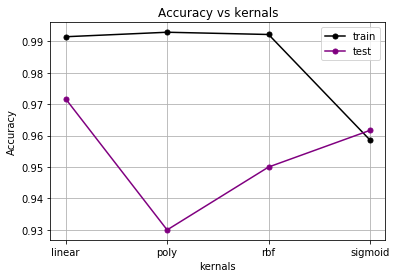

In [23]:
plot_accuracy(kernels,ker_acc_train,ker_acc_test,"Accuracy vs kernals","kernals","Accuracy")

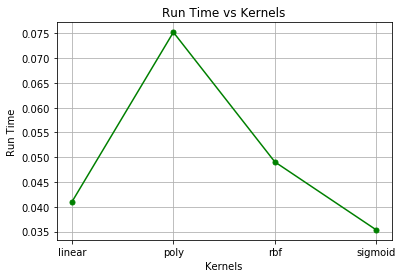

In [24]:
plot_runtime(kernels,ker_run_time,'Run Time vs Kernels','Kernels','Run Time')

In [25]:
SVM

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=5,
    shrinking=True, tol=0.001, verbose=False)

# Accuracy vs Polynomial

In [26]:
deg_poly=np.arange(1,11,1)
poly_run_time=[]
poly_acc_train=[]
poly_acc_test=[]
for i in deg_poly:
    print("--degree:",i,"--")
    start_time = time.time()
    SVM2=SVC(degree=i,kernel='poly',random_state=5)
    SVM2.fit(x_train,y_train)
    end_time = time.time()
    run_time = end_time - start_time
    y_train_pred = SVM2.predict(x_train)
    y_test_pred = SVM2.predict(x_test)
    py1=accuracy_score(y_train,y_train_pred)
    py2=accuracy_score(y_test,y_test_pred)
    poly_acc_train.append(py1)
    poly_acc_test.append(py2)
    poly_run_time.append(run_time)
    

--degree: 1 --
--degree: 2 --
--degree: 3 --
--degree: 4 --
--degree: 5 --
--degree: 6 --
--degree: 7 --
--degree: 8 --
--degree: 9 --
--degree: 10 --


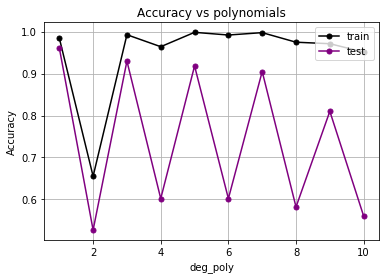

In [27]:
plot_accuracy(deg_poly,poly_acc_train,poly_acc_test,"Accuracy vs polynomials","deg_poly","Accuracy")

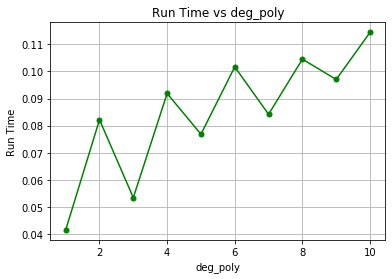

In [28]:
plot_runtime(deg_poly,poly_run_time,'Run Time vs deg_poly','deg_poly','Run Time')# gamme=scale

# K fold Cross Validation

In [29]:
from sklearn.model_selection import cross_val_score
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
folds = list(range(2,12,2))
accuracy_kernel_folds = []
accuracy_folds = []
for i in range(len(kernels)):
    print("---- Running Cross validation for kernel : ", kernels[i], "----")
    for j in range(len(folds)):
        print("---- Running Cross validation for folds : ", folds[j], "----")
        cross_valid = cross_val_score(estimator = SVC(kernel = kernels[i],gamma = 'auto',random_state = 5), 
                                   X = x_train, y = y_train, cv = folds[j])
        
        accuracy_folds.append(cross_valid.mean())
    
    accuracy_kernel_folds.append(accuracy_folds)
    accuracy_folds = []

---- Running Cross validation for kernel :  linear ----
---- Running Cross validation for folds :  2 ----
---- Running Cross validation for folds :  4 ----
---- Running Cross validation for folds :  6 ----
---- Running Cross validation for folds :  8 ----
---- Running Cross validation for folds :  10 ----
---- Running Cross validation for kernel :  poly ----
---- Running Cross validation for folds :  2 ----
---- Running Cross validation for folds :  4 ----
---- Running Cross validation for folds :  6 ----
---- Running Cross validation for folds :  8 ----
---- Running Cross validation for folds :  10 ----
---- Running Cross validation for kernel :  rbf ----
---- Running Cross validation for folds :  2 ----
---- Running Cross validation for folds :  4 ----
---- Running Cross validation for folds :  6 ----
---- Running Cross validation for folds :  8 ----
---- Running Cross validation for folds :  10 ----
---- Running Cross validation for kernel :  sigmoid ----
---- Running Cross validati

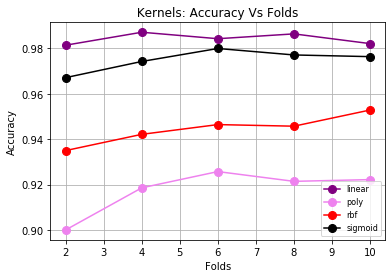

In [30]:
# Plotting the mean accuracies found from cross validtion and test set accuracy
colors = ['purple', 'violet', 'red', 'black']
for i in range(len(kernels)):
    plt.plot(folds, accuracy_kernel_folds[i] , marker ='o', markersize = 8 , color =colors[i],label=kernels[i])

plt.title(" Kernels: Accuracy Vs Folds ")
plt.xlabel("Folds")
plt.grid()
plt.ylabel("Accuracy")
plt.legend(prop={'size': 8})
plt.show()

# Accuracy vs Gamma

In [31]:
gamma_values = ['auto', 1, 10, 100]
gamma_acc_train = []
gamma_acc_test = []
gamma_run_time = []
for i in range(len(gamma_values)):
    print("---- SVM with rbf kernal for gamma value :", gamma_values[i], "----")
    start = time.time()
    gama_svm = SVC(kernel= 'rbf' ,gamma= gamma_values[i], random_state=5)
    gama_svm.fit(x_train , y_train)
    gamma_run_time.append(time.time() - start)
    y2_pred_train = gama_svm.predict(x_train)
    y2_pred_test = gama_svm.predict(x_test)
    gamma_acc_train.append(accuracy_score(y_train,y2_pred_train))
    gamma_acc_test.append(accuracy_score(y_test,y2_pred_test))

---- SVM with rbf kernal for gamma value : auto ----
---- SVM with rbf kernal for gamma value : 1 ----
---- SVM with rbf kernal for gamma value : 10 ----
---- SVM with rbf kernal for gamma value : 100 ----


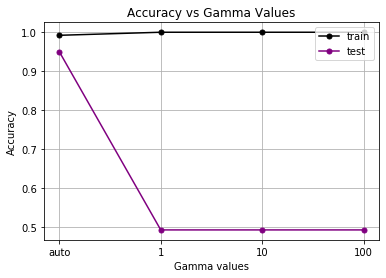

In [32]:
plot_accuracy(gamma_values,gamma_acc_train, gamma_acc_test,
             "Accuracy vs Gamma Values", 'Gamma values', 'Accuracy')

# Decision Tree

In [33]:
det_cri=['gini','entropy']
det_acc_train=[]
det_acc_test=[]
det_acc_time=[]
for i in range(0,len(det_cri)):
    start_time=time.time()
    det = DecisionTreeClassifier(criterion=det_cri[i],random_state=5)
    det.fit(x_train,y_train)
    end_time=time.time()
    run_time=end_time-start_time
    Y_train_predict=det.predict(x_train)
    Y_test_predict=det.predict(x_test)
    Y_acc_train=accuracy_score(y_train,Y_train_predict)
    Y_acc_test=accuracy_score(y_test,Y_test_predict)
    det_acc_train.append(Y_acc_train)
    det_acc_test.append(Y_acc_test)
    det_acc_time.append(run_time)

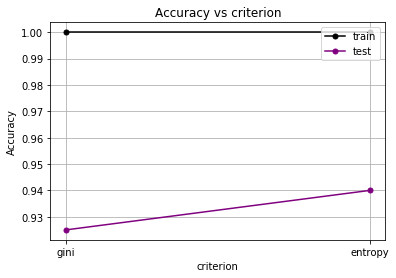

In [34]:
plot_accuracy(det_cri,det_acc_train,det_acc_test,"Accuracy vs criterion","criterion","Accuracy")

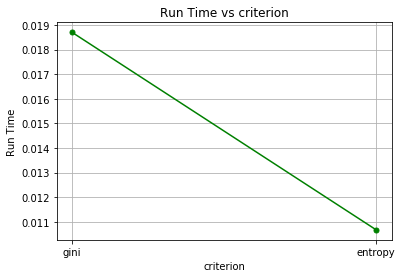

In [35]:
plot_runtime(det_cri,det_acc_time,'Run Time vs criterion','criterion','Run Time')

In [36]:
#det_cri=['gini','entropy']
acc_depth=(1,10,1)
depth_acc_train=[]
depth_acc_test=[]
depth_acc_time=[]
#det2_acc_train=[]
#det2_acc_test=[]
#for i in range(0,len(det_cri)):
for j in range(0,len(acc_depth)):
    start_time=time.time()
    det_depth = DecisionTreeClassifier(max_depth=acc_depth[j],random_state=5)
    det_depth.fit(x_train,y_train)
    end_time=time.time()
    run_time=end_time-start_time
    Y_train_predict2=det_depth.predict(x_train)
    Y_test_predict2=det_depth.predict(x_test)
    Y_acc_train2=accuracy_score(y_train,Y_train_predict2)
    Y_acc_test2=accuracy_score(y_test,Y_test_predict2)
    depth_acc_train.append(Y_acc_train2)
    depth_acc_test.append(Y_acc_test2)
    depth_acc_time.append(run_time)

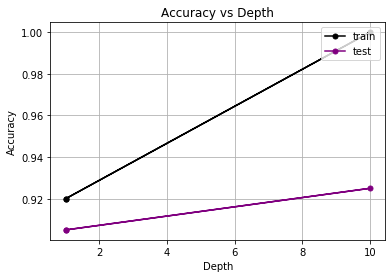

In [37]:
plot_accuracy(acc_depth,depth_acc_train,depth_acc_test,"Accuracy vs Depth","Depth","Accuracy")

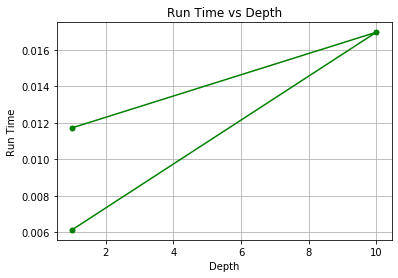

In [38]:
plot_runtime(acc_depth,depth_acc_time,'Run Time vs Depth','Depth','Run Time')

In [19]:
metric = ['gini', 'entropy']
depth = np.arange(5,20,1)
depth_acc_train = []
depth_acc_test = []
metric_acc_train = []
metric_acc_test = []
for i in range(len(metric)):
    for j in range(len(depth)):   
        dtree = DecisionTreeClassifier(criterion=metric[i] ,max_depth=depth[j],  random_state= 5 )
        #print(depth[j])
        dtree.fit(x_train , y_train)
        y_pred_train = dtree.predict(x_train)
        y_pred_test = dtree.predict(x_test)
        depth_acc_train.append(round(accuracy_score(y_train,y_pred_train),4))
        depth_acc_test.append(round(accuracy_score(y_test,y_pred_test),4))
        #print(depth_acc_train)
        #print(depth_acc_test)
    
    metric_acc_train.append(depth_acc_train)
    metric_acc_test.append(depth_acc_test)
    depth_acc_train = []
    depth_acc_test = []

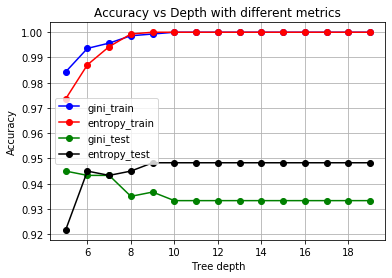

In [20]:
plt.plot(depth,metric_acc_train[0],marker='o',markersize=6,color='blue',label='gini_train')
plt.plot(depth,metric_acc_train[1],marker='o',markersize=6,color='red',label='entropy_train')
plt.plot(depth,metric_acc_test[0],marker='o',markersize=6,color='green',label='gini_test')
plt.plot(depth,metric_acc_test[1],marker='o',markersize=6,color='black',label='entropy_test')
plt.title('Accuracy vs Depth with different metrics')
plt.xlabel('Tree depth')
plt.grid()
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Boosting

# Experimentation with depth

In [39]:
# Experimentation with depth
boost_depth = np.arange(5,25,2)
boost_train = []
boost_test = []
for i in boost_depth:   
    boost = XGBClassifier(max_depth=i,random_state= 5 )
    boost.fit(x_train,y_train)
    y_pred_train = boost.predict(x_train)
    y_pred_test = boost.predict(x_test)
    boost_train.append(accuracy_score(y_train,y_pred_train))
    boost_test.append(accuracy_score(y_test,y_pred_test))

In [40]:
boost_train

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

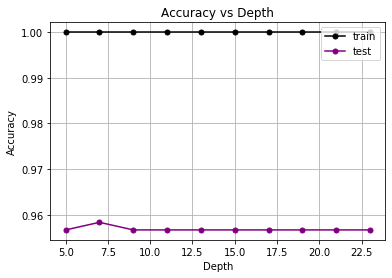

In [41]:
plot_accuracy(boost_depth,boost_train,boost_test,"Accuracy vs Depth","Depth","Accuracy")

# Experimentation with boosting levels 

In [42]:
boost_level = np.arange(1,100,20)
acc_boost_train = []
acc_boost_test = []
for i in boost_level:   
    boost_level2 = XGBClassifier(n_estimators = i,random_state= 5)
    boost_level2.fit(x_train,y_train)
    y_pred_boost_train = boost_level2.predict(x_train)
    y_pred_boost_test = boost_level2.predict(x_test)
    acc_boost_train.append(accuracy_score(y_train,y_pred_boost_train))
    acc_boost_test.append(accuracy_score(y_test,y_pred_boost_test))

In [43]:
acc_boost_test

[0.93, 0.9433333333333334, 0.9516666666666667, 0.96, 0.96]

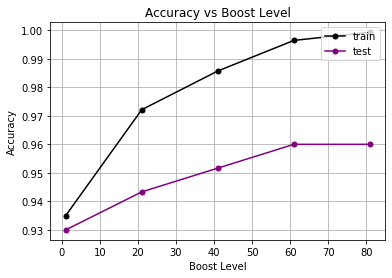

In [44]:
plot_accuracy(boost_level,acc_boost_train,acc_boost_test,'Accuracy vs Boost Level','Boost Level','Accuracy')

# Experimentation with learning rate parameter

In [45]:
learning_rate =(0.001,0.01,0.1,0.5)
acc__learningrate_train = []
acc_learningrate_test = []
for i in range(0,len(learning_rate)):
    learning_rate2 = XGBClassifier(learning_rate=learning_rate[i],random_state=5)
    learning_rate2.fit(x_train,y_train)
    y_pred_learning_rate_train = learning_rate2.predict(x_train)
    y_pred_learning_rate_test = learning_rate2.predict(x_test)
    acc__learningrate_train.append(accuracy_score(y_train,y_pred_learning_rate_train))
    acc_learningrate_test.append(accuracy_score(y_test,y_pred_learning_rate_test))

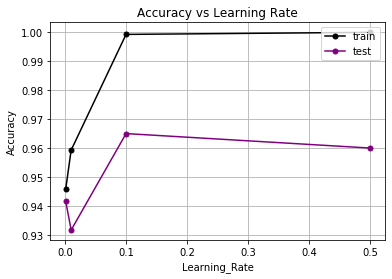

In [46]:
plot_accuracy(learning_rate,acc__learningrate_train,acc_learningrate_test,'Accuracy vs Learning Rate','Learning_Rate','Accuracy')

In [47]:
Boosted_tree = XGBClassifier(max_depth = 10,random_state = 5,n_estimators = 80,learning_rate = 0.5)
Boosted_tree.fit(x_train,y_train)
y_pred_Boosted_tree = Boosted_tree.predict(x_test)
### confusion matrix
CM_BT_C = confusion_matrix(y_test,y_pred_Boosted_tree)
print(CM_BT_C) 
accuracy_BT2 = accuracy_score(y_test,y_pred_Boosted_tree)
accuracies_bt_2 = cross_val_score(estimator = Boosted_tree, X = x_train,y = y_train,cv = 10)
mean_acc_bt_2 = accuracies_bt_2.mean()

[[290  15]
 [  7 288]]


In [48]:

# Applying k-Fold Cross Validation on TRAIN dataset

from sklearn.model_selection import cross_val_score

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
folds = list(range(2,12,2))
mean_accuracy_kernel_folds = []
mean_accuracy_folds = []


for i in range(len(kernels)):
    print("---- Running Cross validation for kernel : ", kernels[i], "----")
    for j in range(len(folds)):
        print("---- Running Cross validation for folds : ", folds[j], "----")
        score = cross_val_score(estimator = SVC(kernel = kernels[i], gamma = 'auto', random_state = 5), 
                                   X = x_train, y = y_train, cv = folds[j])
        
        mean_accuracy_folds.append(score.mean())
    
    mean_accuracy_kernel_folds.append(mean_accuracy_folds)
    mean_accuracy_folds = []

---- Running Cross validation for kernel :  linear ----
---- Running Cross validation for folds :  2 ----
---- Running Cross validation for folds :  4 ----
---- Running Cross validation for folds :  6 ----
---- Running Cross validation for folds :  8 ----
---- Running Cross validation for folds :  10 ----
---- Running Cross validation for kernel :  poly ----
---- Running Cross validation for folds :  2 ----
---- Running Cross validation for folds :  4 ----
---- Running Cross validation for folds :  6 ----
---- Running Cross validation for folds :  8 ----
---- Running Cross validation for folds :  10 ----
---- Running Cross validation for kernel :  rbf ----
---- Running Cross validation for folds :  2 ----
---- Running Cross validation for folds :  4 ----
---- Running Cross validation for folds :  6 ----
---- Running Cross validation for folds :  8 ----
---- Running Cross validation for folds :  10 ----
---- Running Cross validation for kernel :  sigmoid ----
---- Running Cross validati

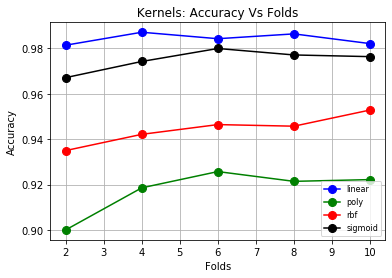

In [49]:
# Plotting the mean accuracies found from cross validtion and test set accuracy
colors = ['blue', 'green', 'red', 'black']
for i in range(len(kernels)):
    plt.plot(folds , mean_accuracy_kernel_folds[i] , marker ='o', markersize = 8 , color =colors[i],label=kernels[i])

plt.title(" Kernels: Accuracy Vs Folds ")
plt.xlabel("Folds")
plt.grid()
plt.ylabel("Accuracy")
plt.legend(prop={'size': 8})
plt.show()

In [50]:
# Applying k-Fold Cross Validation
# Number of folds = 10
from sklearn.model_selection import cross_val_score

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
mean_accuracy_kernels = []

for i in range(len(kernels)): 
    print("---- Running Cross validation for kernel : ", kernels[i], "----")
    score = cross_val_score(estimator = SVC(kernel = kernels[i], gamma = 'auto', random_state = 5), 
                               X = x_train, y = y_train, cv = 10)
    mean_accuracy_kernels.append(score.mean())

---- Running Cross validation for kernel :  linear ----
---- Running Cross validation for kernel :  poly ----
---- Running Cross validation for kernel :  rbf ----
---- Running Cross validation for kernel :  sigmoid ----


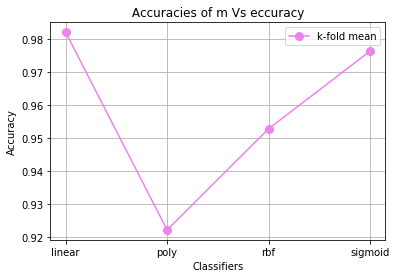

In [51]:
# Plotting the mean accuracies found from cross validtion and test set accuracy
plt.plot(kernels , mean_accuracy_kernels , marker ='o', markersize = 8 , color ='violet',label='k-fold mean')
#plt.plot(range_svm , test_acc,  marker ='o', markersize = 8 , color ='black',label='Test set accuracy')
plt.title(" Accuracies of m Vs eccuracy ")
plt.xlabel("Classifiers")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [60]:
import time
import math
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sci
#import plotly.offline as py
#import plotly.graph_objs as go
#py.init_notebook_mode(connected=True)

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from hyperopt import hp, tpe, Trials, STATUS_OK
from hyperopt import fmin

from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
%matplotlib inline

In [62]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1.0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1.0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0.0


In [63]:
df.iloc[:, 0:-1]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [64]:
# defining feature matrix(X) and response vector(y) 

X = df.iloc[:, 0:-1]
y = df["Price"]
  


# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.5,random_state=1) 

In [65]:
def org_results(trials, hyperparams, model_name):
    fit_idx = -1
    for idx, fit  in enumerate(trials):
        hyp = fit['misc']['vals']
        xgb_hyp = {key:[val] for key, val in hyperparams.items()}
        if hyp == xgb_hyp:
            fit_idx = idx
            break
            
    train_time = str(trials[-1]['refresh_time'] - trials[0]['book_time'])
    acc = round(trials[fit_idx]['result']['accuracy'], 3)
    train_auc = round(trials[fit_idx]['result']['train auc'], 3)
    test_auc = round(trials[fit_idx]['result']['test auc'], 3)

    results = {
        'model': model_name,
        'parameter search time': train_time,
        'accuracy': acc,
        'test auc score': test_auc,
        'training auc score': train_auc,
        'parameters': hyperparams
    }
    return results

In [66]:
def xgb_objective(space, early_stopping_rounds=50):
    
    model = XGBClassifier(
        learning_rate = space['learning_rate'], 
        n_estimators = int(space['n_estimators']), 
        max_depth = int(space['max_depth']), 
        min_child_weight = space['m_child_weight'], 
        gamma = space['gamma'], 
        subsample = space['subsample'], 
        colsample_bytree = space['colsample_bytree'],
        objective = 'binary:logistic'
    )

    model.fit(train_x, train_y, 
              eval_set = [(train_x, train_y), (test_x, test_y)],
              eval_metric = 'auc',
              early_stopping_rounds = early_stopping_rounds,
              verbose = False)
     
    predictions = model.predict(test_x)
    test_preds = model.predict_proba(test_x)[:,1]
    train_preds = model.predict_proba(train_x)[:,1]
    
    xgb_booster = model.get_booster()
    train_auc = roc_auc_score(train_y, train_preds)
    test_auc = roc_auc_score(test_y, test_preds)
    accuracy = accuracy_score(test_y, predictions) 

    return {'status': STATUS_OK, 'loss': 1-test_auc, 'accuracy': accuracy,
            'test auc': test_auc, 'train auc': train_auc
           }

space = {
    'n_estimators': hp.quniform('n_estimators', 50, 1000, 25),
    'max_depth': hp.quniform('max_depth', 1, 12, 1),
    'm_child_weight': hp.quniform('m_child_weight', 1, 6, 1),
    'gamma': hp.quniform('gamma', 0.5, 1, 0.05),
    'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
    'learning_rate': hp.loguniform('learning_rate', np.log(.001), np.log(.3)),
    'colsample_bytree': hp.quniform('colsample_bytree', .5, 1, .1)
}

trials = Trials()
xgb_hyperparams = fmin(fn = xgb_objective, 
                 max_evals = 150, 
                 trials = trials,
                 algo = tpe.suggest,
                 space = space
                 )

xgb_results = org_results(trials.trials, xgb_hyperparams, 'XGBoost')
display(xgb_results)

100%|██████████| 150/150 [01:53<00:00,  1.32it/s, best loss: 0.0020928218615690053]


{'model': 'XGBoost',
 'parameter search time': '0:01:53.957000',
 'accuracy': 0.974,
 'test auc score': 0.998,
 'training auc score': 1.0,
 'parameters': {'colsample_bytree': 1.0,
  'gamma': 0.5,
  'learning_rate': 0.12307935650199768,
  'm_child_weight': 1.0,
  'max_depth': 2.0,
  'n_estimators': 350.0,
  'subsample': 0.55}}